## 第四节：高阶数据探索

## 4.2 高阶数据探索实战

### 4.2.1 数据读取

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
### 数据读取
path  = 'D:\Documents\天池竞赛\阿里云安全恶意程序检测\dataset\\'
train = pd.read_csv(path + 'security_train.csv')
test  = pd.read_csv(path + 'security_test.csv')

In [9]:
train.head()

,file_id,label,api,tid,index
0,1,5,LdrLoadDll,2488,0
1,1,5,LdrGetProcedureAddress,2488,1
2,1,5,LdrGetProcedureAddress,2488,2
3,1,5,LdrGetProcedureAddress,2488,3
4,1,5,LdrGetProcedureAddress,2488,4


### 4.2.2 多变量交叉探索

In [10]:
train_analysis = train[['file_id','label']].drop_duplicates(subset = ['file_id','label'], keep = 'last')

In [11]:
dic_ = train['file_id'].value_counts().to_dict()
train_analysis['file_id_cnt'] = train_analysis['file_id'].map(dic_).values 

In [12]:
train_analysis['file_id_cnt'].value_counts()

5001    448
268     211
44      186
4       160
16      149
       ... 
6882      1
6776      1
4400      1
2163      1
1319      1
Name: file_id_cnt, Length: 6204, dtype: int64

d:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='file_id_cnt', ylabel='Density'>

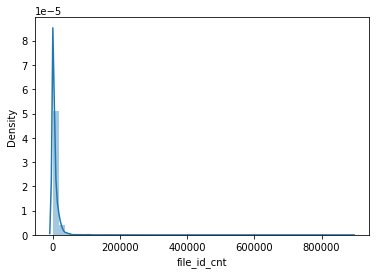

In [13]:
sns.distplot(train_analysis['file_id_cnt'])

In [14]:
print('There are {} data are below 10000'.format(np.sum(train_analysis['file_id_cnt'] <= 1e4) / train_analysis.shape[0]))

There are 0.8012529704039749 data are below 10000


In [15]:
###  file_id_cnt & label 分析
def file_id_cnt_cut(x):
    if x< 15000:
        return x // 1e3
    else:
        return 15 

train_analysis['file_id_cnt_cut'] = train_analysis['file_id_cnt'].map(file_id_cnt_cut).values

Text(0, 0.5, 'label_number')

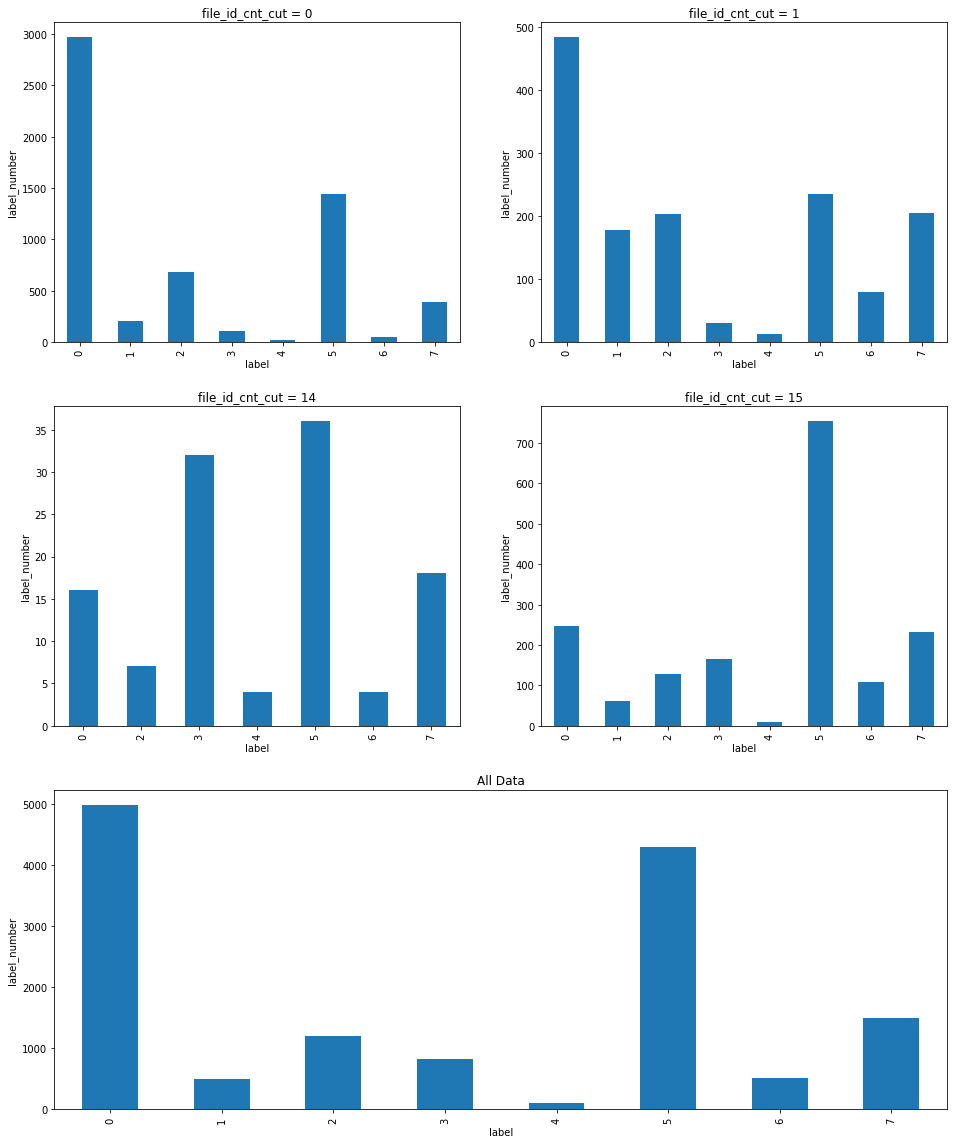

In [16]:
plt.figure(figsize=[16,20])
plt.subplot(321) 
train_analysis[train_analysis['file_id_cnt_cut'] == 0]['label'].value_counts().sort_index().plot(kind = 'bar')
plt.title('file_id_cnt_cut = 0')
plt.xlabel('label')
plt.ylabel('label_number')

plt.subplot(322)
train_analysis[train_analysis['file_id_cnt_cut'] == 1]['label'].value_counts().sort_index().plot(kind = 'bar')
plt.title('file_id_cnt_cut = 1')
plt.xlabel('label')
plt.ylabel('label_number')
 
plt.subplot(323)
train_analysis[train_analysis['file_id_cnt_cut'] == 14]['label'].value_counts().sort_index().plot(kind = 'bar')
plt.title('file_id_cnt_cut = 14')
plt.xlabel('label')
plt.ylabel('label_number')

plt.subplot(324)
train_analysis[train_analysis['file_id_cnt_cut'] == 15]['label'].value_counts().sort_index().plot(kind = 'bar')
plt.title('file_id_cnt_cut = 15')
plt.xlabel('label')
plt.ylabel('label_number')

plt.subplot(313) 
train_analysis['label'].value_counts().sort_index().plot(kind = 'bar') 
plt.title('All Data')
plt.xlabel('label')
plt.ylabel('label_number') 

d:\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 76.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 29.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 52.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 49.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 36.2% of the points cannot be placed; you may want to decrease the size of the marke

<AxesSubplot:xlabel='label', ylabel='file_id_cnt'>

d:\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 76.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 50.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


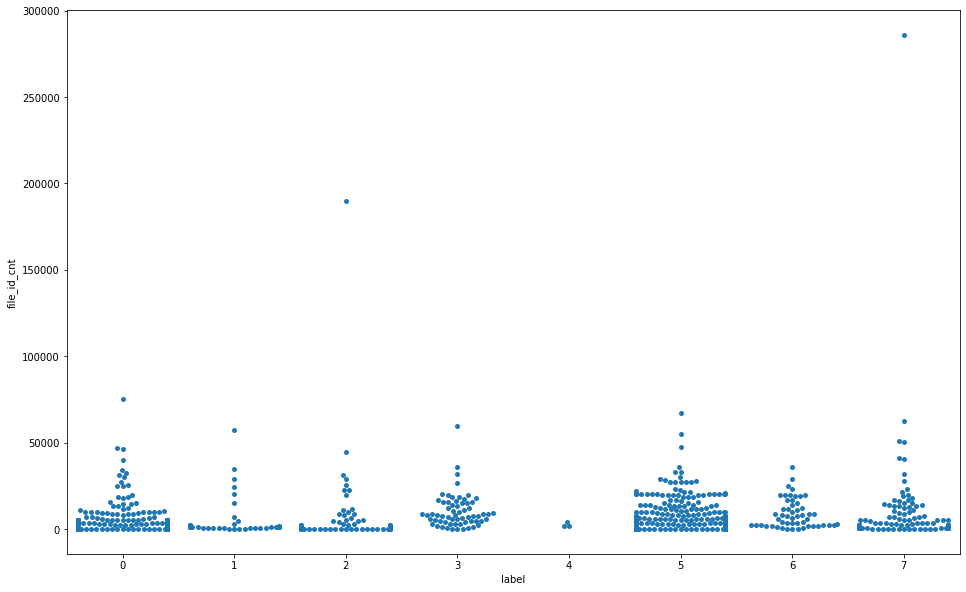

In [17]:
plt.figure(figsize=[16,10])
sns.swarmplot(x =train_analysis.iloc[:1000]['label'], y = train_analysis.iloc[:1000]['file_id_cnt'])

##### file_id & api 分析

In [18]:
dic_ = train.groupby('file_id')['api'].nunique().to_dict()
train_analysis['file_id_api_nunique'] = train_analysis['file_id'].map(dic_).values 

d:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='file_id_api_nunique', ylabel='Density'>

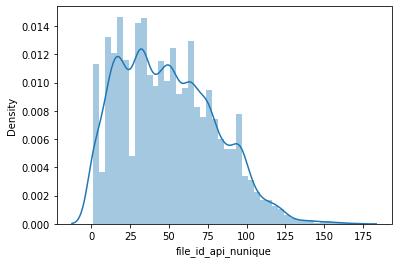

In [19]:
sns.distplot(train_analysis['file_id_api_nunique']) 

In [20]:
train_analysis['file_id_api_nunique'].describe()

count    13887.000000
mean        49.263700
std         30.338888
min          1.000000
25%         24.000000
50%         47.000000
75%         71.000000
max        170.000000
Name: file_id_api_nunique, dtype: float64

Text(0, 0.5, 'label_number')

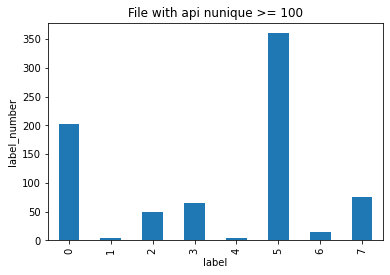

In [21]:
train_analysis.loc[train_analysis.file_id_api_nunique >=100]['label'].value_counts().sort_index().plot(kind = 'bar') 
plt.title('File with api nunique >= 100')
plt.xlabel('label')
plt.ylabel('label_number') 

<AxesSubplot:xlabel='label', ylabel='file_id_api_nunique'>

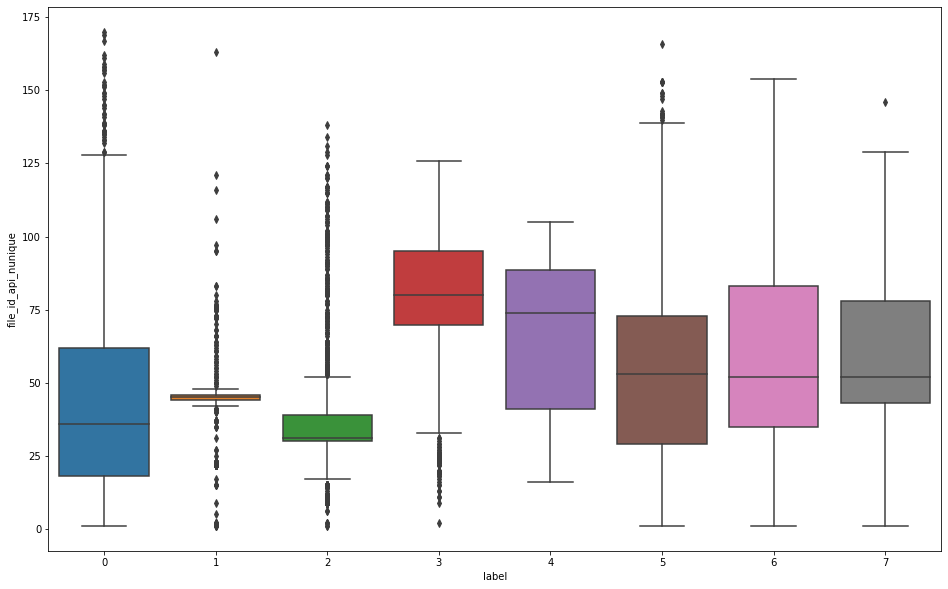

In [22]:
plt.figure(figsize=[16,10])
sns.boxplot(x =train_analysis['label'], y = train_analysis['file_id_api_nunique'])

##### file_id & index 分析

In [23]:
dic_ = train.groupby('file_id')['index'].nunique().to_dict()
train_analysis['file_id_index_nunique'] = train_analysis['file_id'].map(dic_).values 

In [24]:
train_analysis['file_id_index_nunique'].describe()

count    13887.000000
mean      1770.645136
std       1934.542352
min          1.000000
25%        135.000000
50%        924.000000
75%       3628.000000
max       5001.000000
Name: file_id_index_nunique, dtype: float64

d:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='file_id_index_nunique', ylabel='Density'>

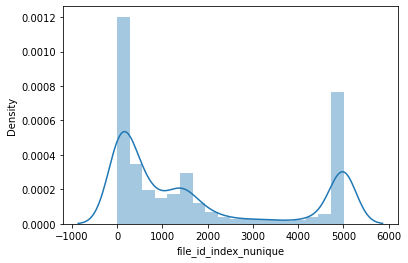

In [25]:
sns.distplot(train_analysis['file_id_index_nunique']) 

##### file_id_index_nunique + label 分析

Text(0, 0.5, 'label_number')

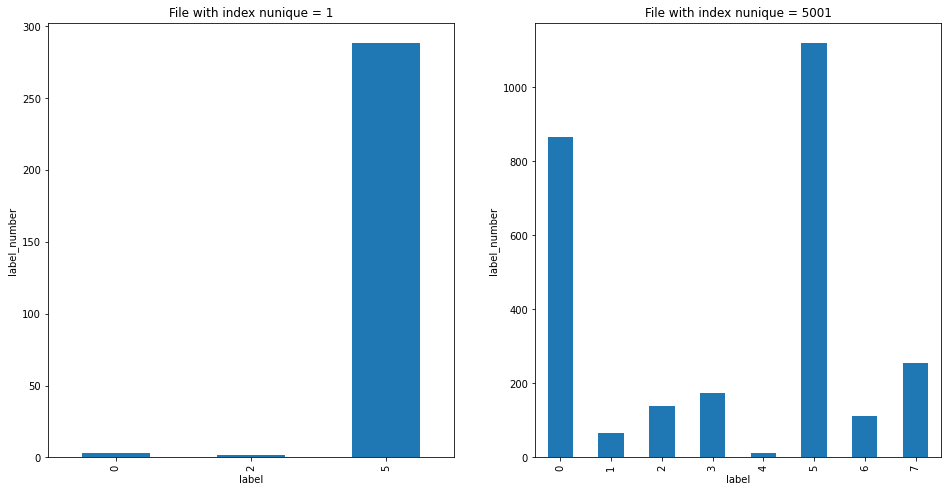

In [26]:
plt.figure(figsize=[16,8])
plt.subplot(121)
train_analysis.loc[train_analysis.file_id_index_nunique == 1]['label'].value_counts().sort_index().plot(kind = 'bar') 
plt.title('File with index nunique = 1')
plt.xlabel('label')
plt.ylabel('label_number') 

plt.subplot(122)
train_analysis.loc[train_analysis.file_id_index_nunique == 5001]['label'].value_counts().sort_index().plot(kind = 'bar') 
plt.title('File with index nunique = 5001')
plt.xlabel('label')
plt.ylabel('label_number') 

<AxesSubplot:xlabel='label', ylabel='file_id_api_nunique'>

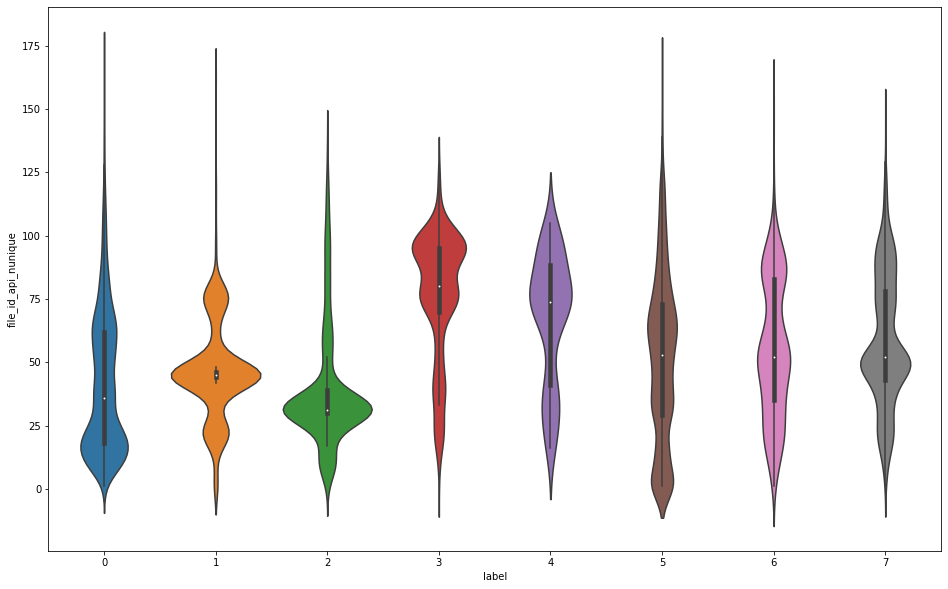

In [27]:
plt.figure(figsize=[16,10])
sns.violinplot(x =train_analysis['label'], y = train_analysis['file_id_api_nunique'])

这张图片展示了一个小提琴图（Violin Plot），它是一种统计图表，用于展示数据的分布情况。小提琴图结合了箱线图和密度图的优点，能够更全面地展示数据的分布特征。

在这张小提琴图中，横轴（x轴）表示不同的标签（label），纵轴（y轴）表示某个数值变量（file_id api_unique）。每个标签对应一个小提琴形状的图形，图形的宽度反映了该标签下数据的密度分布情况，越宽表示该区域的数据点越多。图形内部的黑色线条是箱线图，显示了数据的四分位数范围（IQR）和中位数，其中的白色点表示中位数。

从图中可以看出，不同标签下的数据分布情况各不相同，有些标签的数据分布较为集中，而有些标签的数据分布较为分散。

##### file_id & index & max

In [28]:
dic_ = train.groupby('file_id')['index'].max().to_dict()
train_analysis['file_id_index_max'] = train_analysis['file_id'].map(dic_).values 

d:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='file_id_index_max', ylabel='Density'>

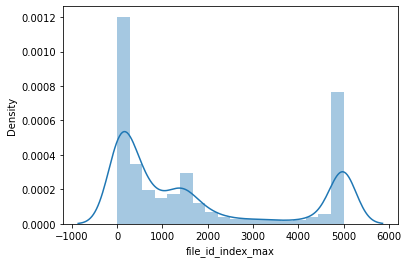

In [29]:
sns.distplot(train_analysis['file_id_index_max']) 

<AxesSubplot:xlabel='label', ylabel='file_id_index_max'>

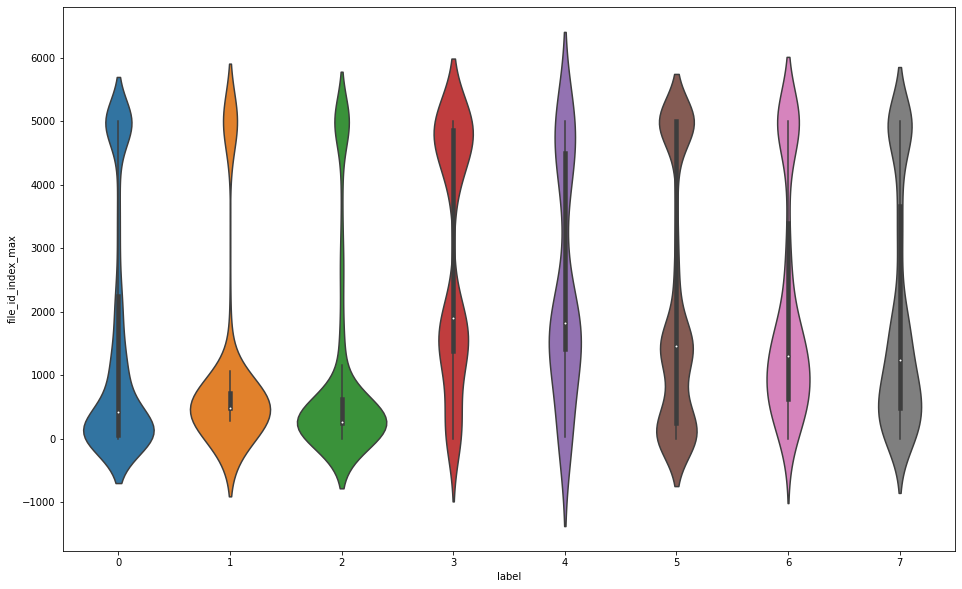

In [30]:
plt.figure(figsize=[16,10])
sns.violinplot(x =train_analysis['label'], y = train_analysis['file_id_index_max'])

<AxesSubplot:xlabel='label', ylabel='file_id_index_max'>

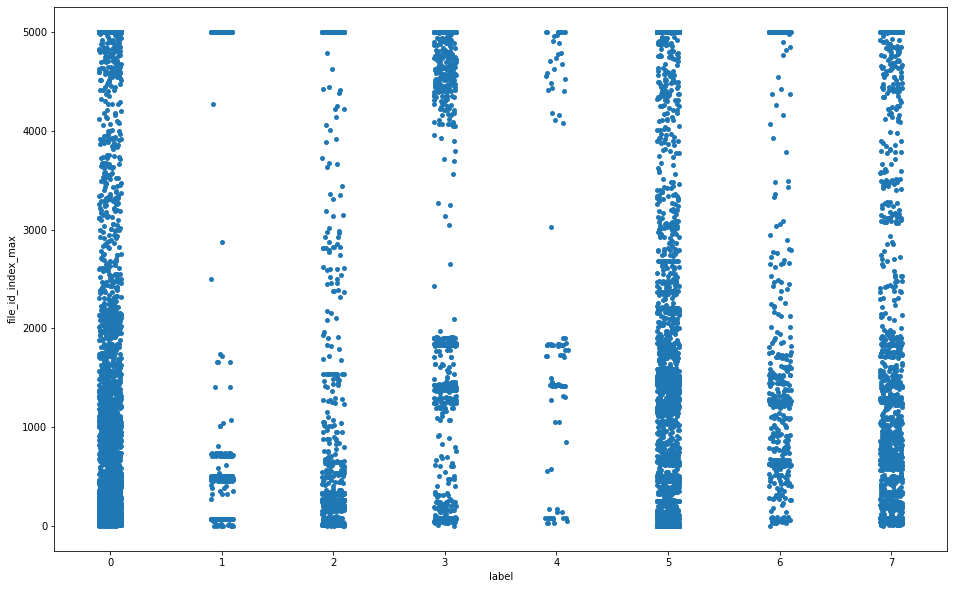

In [31]:
plt.figure(figsize=[16,10])
sns.stripplot(x =train_analysis['label'], y = train_analysis['file_id_index_max'])

##### file_id & tid 分析

In [32]:
dic_ = train.groupby('file_id')['tid'].nunique().to_dict()
train_analysis['file_id_tid_nunique'] = train_analysis['file_id'].map(dic_).values 

In [33]:
train_analysis['file_id_tid_nunique'].describe()

count    13887.000000
mean        18.797724
std         55.212772
min          1.000000
25%          2.000000
50%          4.000000
75%         17.000000
max       1965.000000
Name: file_id_tid_nunique, dtype: float64

d:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='file_id_tid_nunique', ylabel='Density'>

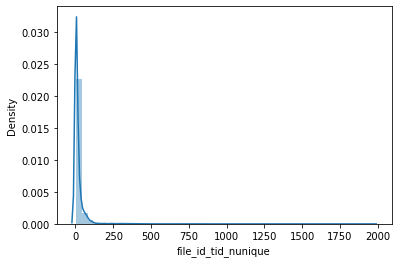

In [34]:
sns.distplot(train_analysis['file_id_tid_nunique']) 

##### file_id_tid_nunique & label 分析

Text(0, 0.5, 'label_number')

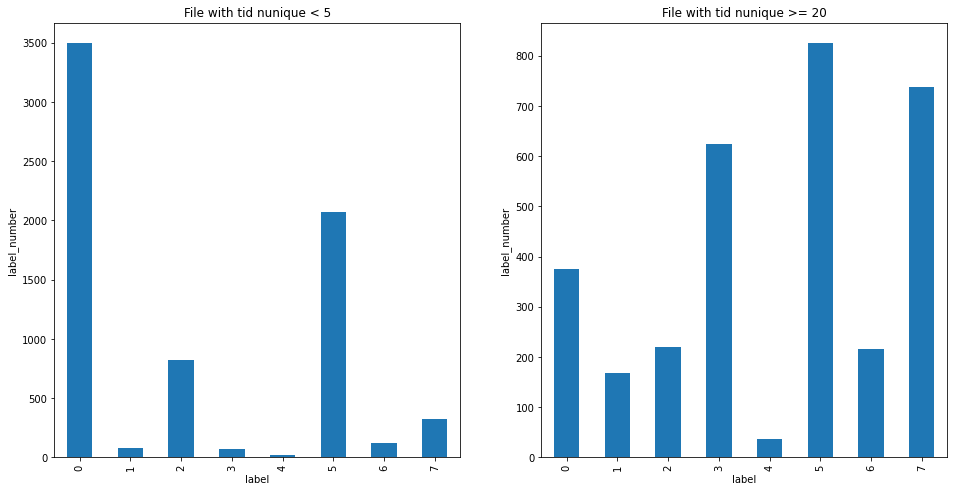

In [38]:
plt.figure(figsize=[16,8])
plt.subplot(121)
train_analysis.loc[train_analysis.file_id_tid_nunique < 5]['label'].value_counts().sort_index().plot(kind = 'bar') 
plt.title('File with tid nunique < 5')
plt.xlabel('label')
plt.ylabel('label_number') 

plt.subplot(122)
train_analysis.loc[train_analysis.file_id_tid_nunique >= 20]['label'].value_counts().sort_index().plot(kind = 'bar') 
plt.title('File with tid nunique >= 20')
plt.xlabel('label')
plt.ylabel('label_number') 

<AxesSubplot:xlabel='label', ylabel='file_id_tid_nunique'>

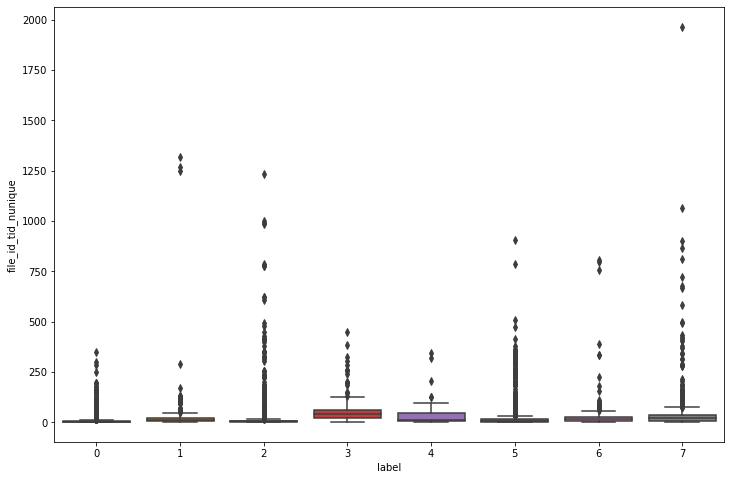

In [39]:
plt.figure(figsize=[12,8])
sns.boxplot(x =train_analysis['label'], y = train_analysis['file_id_tid_nunique'])

<AxesSubplot:xlabel='label', ylabel='file_id_tid_nunique'>

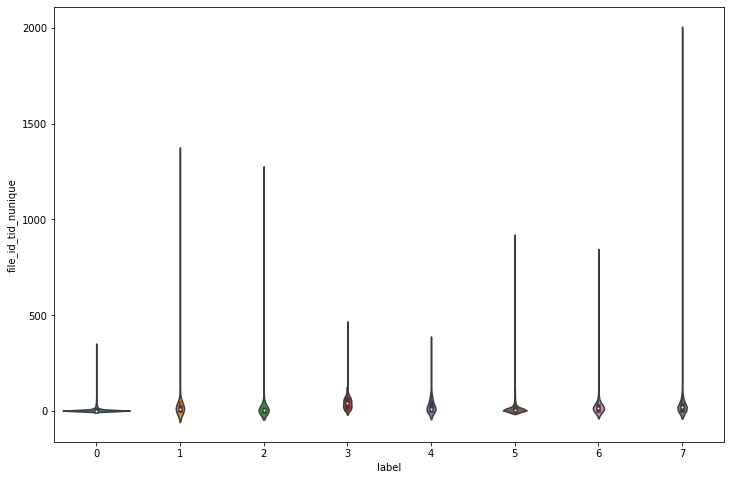

In [40]:
plt.figure(figsize=[12,8])
sns.violinplot(x =train_analysis['label'], y = train_analysis['file_id_tid_nunique'])

##### file_id & tid & max

In [35]:
dic_ = train.groupby('file_id')['tid'].max().to_dict()
train_analysis['file_id_tid_max'] = train_analysis['file_id'].map(dic_).values 

In [36]:
train_analysis['file_id_tid_max'].describe()

count    13887.000000
mean      2782.530424
std        420.516683
min        184.000000
25%       2612.000000
50%       2792.000000
75%       2964.000000
max      20896.000000
Name: file_id_tid_max, dtype: float64

d:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='file_id_tid_max', ylabel='Density'>

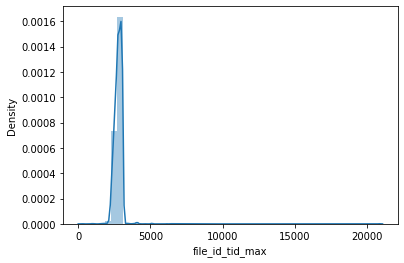

In [37]:
sns.distplot(train_analysis['file_id_tid_max']) 

##### file_id_tid_max & label 分析

Text(0, 0.5, 'label_number')

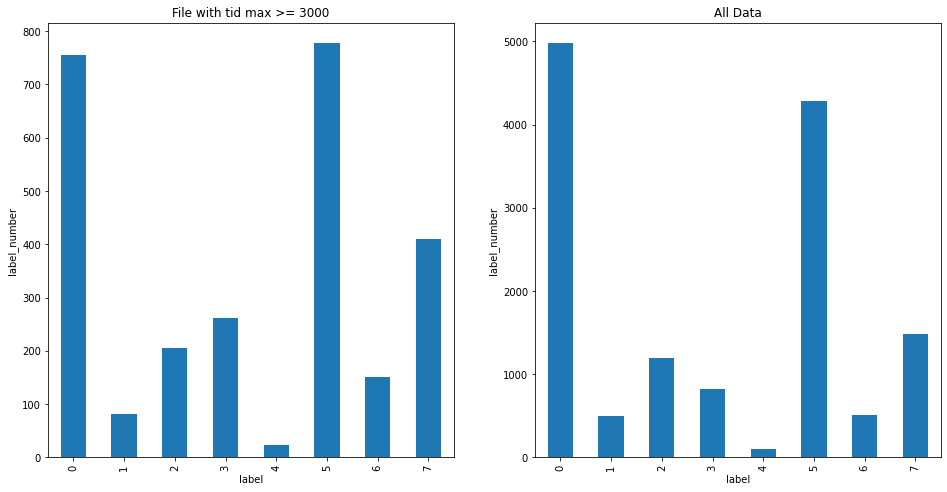

In [41]:
plt.figure(figsize=[16,8])
plt.subplot(121)
train_analysis.loc[train_analysis.file_id_tid_max >= 3000]['label'].value_counts().sort_index().plot(kind = 'bar') 
plt.title('File with tid max >= 3000')
plt.xlabel('label')
plt.ylabel('label_number') 
 
plt.subplot(122)
train_analysis['label'].value_counts().sort_index().plot(kind = 'bar') 
plt.title('All Data')
plt.xlabel('label')
plt.ylabel('label_number')  

##### api & label

In [42]:
train['api_label'] = train['api'] + '_' + train['label'].astype(str)
dic_ = train['api_label'].value_counts().to_dict()

In [43]:
df_api_label = pd.DataFrame.from_dict(dic_,orient = 'index').reset_index()
df_api_label.columns = ['api_label', 'api_label_count']

In [44]:
df_api_label['label'] = df_api_label['api_label'].apply(lambda x:int(x.split('_')[-1]))

In [45]:
labels = df_api_label['label'].unique()
for label in range(8):
    print('*' * 50, label,'*' * 50)
    print(df_api_label.loc[df_api_label.label == label].sort_values('api_label_count').iloc[-5:][['api_label','api_label_count']])
    print('*' * 103)

************************************************** 0 **************************************************
                   api_label  api_label_count
20     CryptDecodeObjectEx_0           808724
19           RegOpenKeyExW_0           815653
11  LdrGetProcedureAddress_0          1067389
9                  NtClose_0          1150929
5         RegQueryValueExW_0          1793509
*******************************************************************************************************
************************************************** 1 **************************************************
                    api_label  api_label_count
180             RegCloseKey_1            83134
160              NtReadFile_1           101051
102  LdrGetProcedureAddress_1           199218
75                  NtClose_1           268922
72         RegQueryValueExW_1           283562
*******************************************************************************************************
**************************